# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    -Unsupervised ML
##### **Contribution**    - Individual

# **Project Summary -**

This project's goal is to cluster and analyse a Netflix-related dataset. The dataset includes a number of characteristics related to Netflix films and television series, including runtime, rating, genre, title, and release year. Finding patterns and commonalities in the platform's material and organising them into useful clusters is the goal.
The dataset will first undergo preprocessing, which includes resolving missing values, eliminating superfluous columns, and converting categorical variables into numerical representations. Techniques for feature engineering can also be used to wring value out of the available attributes.After that, methods for exploratory data analysis (EDA) will be applied in order to obtain understanding of the dataset. It will be possible to comprehend the distribution of variables, spot patterns, and investigate connections between various properties by using statistical summaries and visualisations.
Clustering algorithms like k-means, hierarchical clustering, or density-based spatial clustering will be used once the dataset has been extensively examined. These algorithms will combine films and TV series from Netflix that are similar in terms of their qualities. We'll use methods like silhouette analysis and the elbow approach to figure out the ideal amount of clusters.The outcomes of the clustering process will be assessed and explained. To identify the traits and trends that each group has in common, the clusters will be examined. Regarding content classification, recommendation engines, and content acquisition tactics, this investigation will give Netflix useful information.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**




The Netflix movies and TV series that are accessible as of 2019 are included in this dataset. The third-party Netflix search engine Flixable is where the dataset was gathered.

An intriguing analysis was issued in 2018 indicating that since 2010, the quantity of TV series available on Netflix has almost tripled. Since 2010, the number of films available on the streaming service has dropped by almost 2,000, but the number of TV episodes available has almost tripled. Investigating what further insights might be gleaned from the same dataset will be interesting.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
df=pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv')

### Dataset First View

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [4]:
df.shape

(7787, 12)

### Dataset Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [6]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


#### Missing Values/Null Values

In [7]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


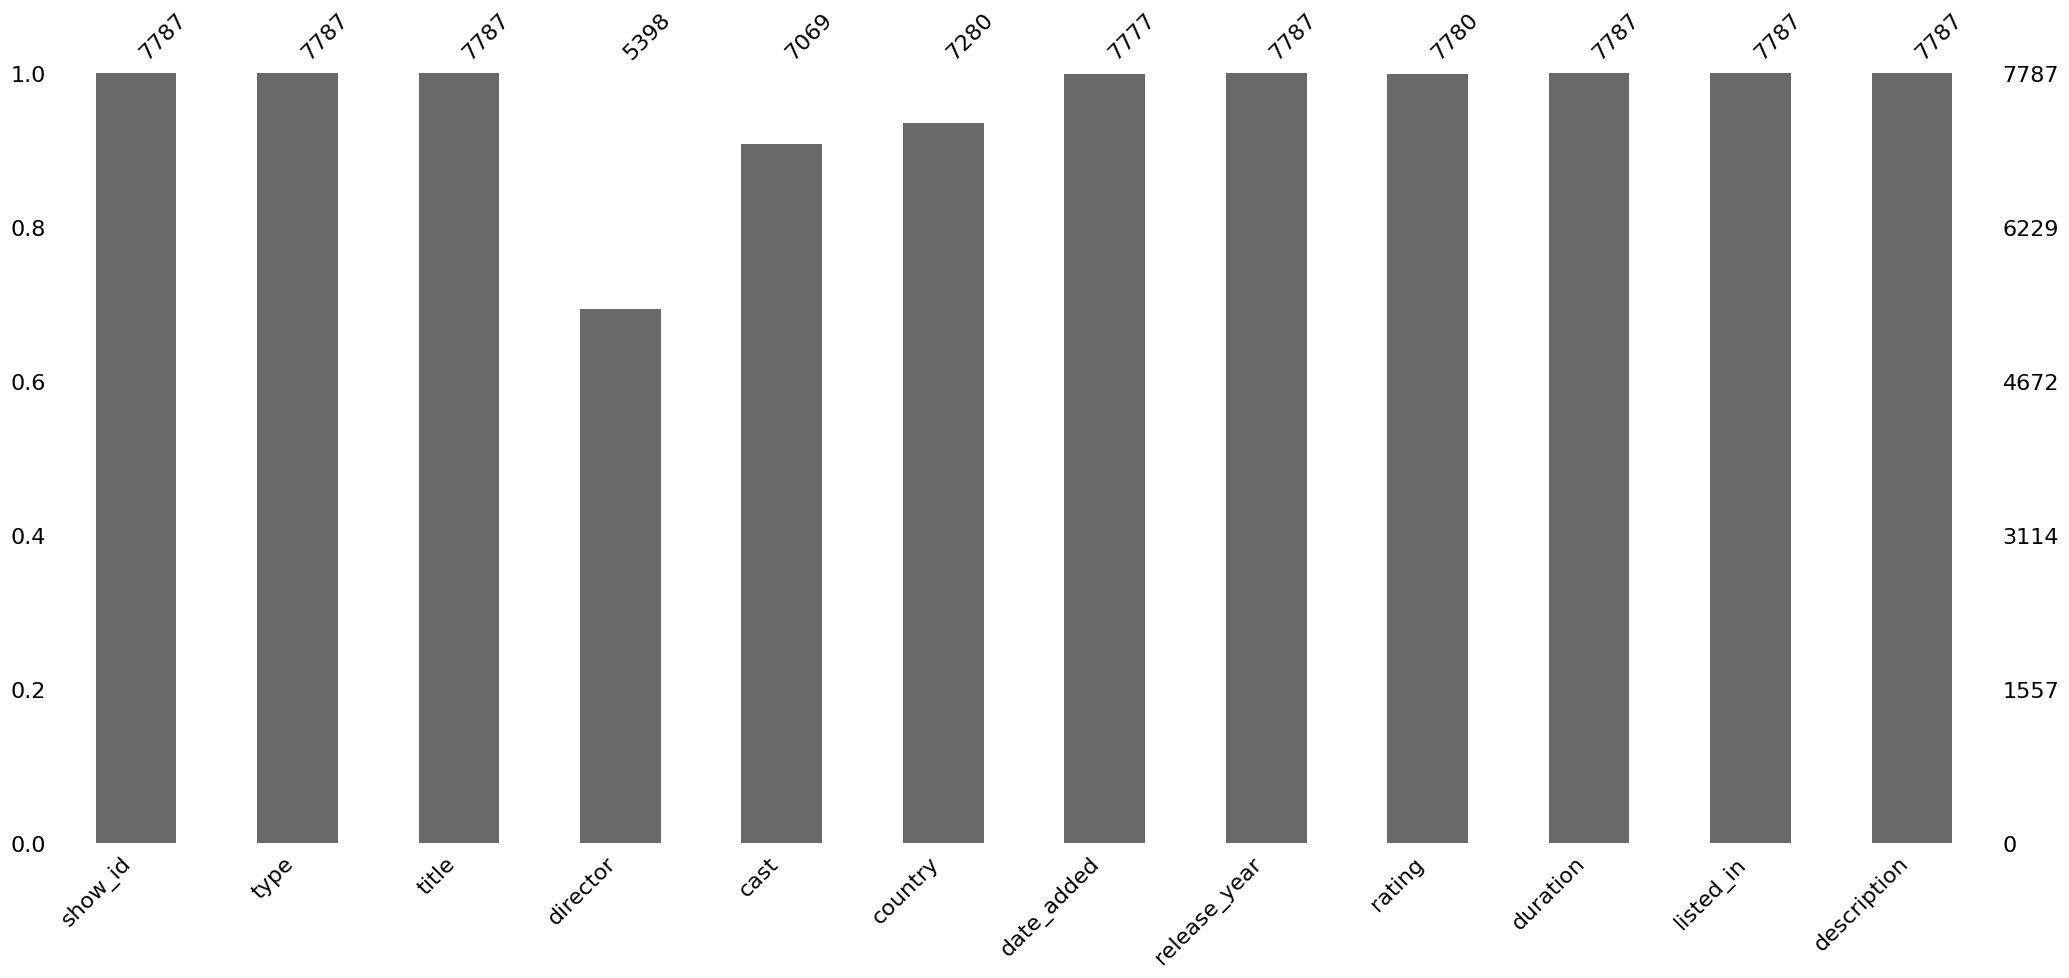

In [8]:
# Visualizing the missing values
import missingno as msno

msno.bar(df)
plt.show()


## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description


show_id: Unique ID for every Movie / Tv Show

type: Identifier - A Movie or TV Show

title: Title of the Movie / Tv Show

director: Director of the Movie

cast: Actors involved in the movie / show

country: Country where the movie / show was produced

date_added: Date it was added on Netflix

release_year: Actual Releaseyear of the movie / show

rating: TV Rating of the movie / show

duration: Total Duration in minutes or number of seasons

listed in: Genere

description: The Summary description

## 3. ***Data Wrangling***

### Data Wrangling Code

In [4]:
# Write your code to make your dataset analysis ready.
df.replace(np.nan,'others',inplace = True)

In [5]:
df.replace(np.nan,'other_country',inplace = True)

In [6]:
df.dropna(subset=['cast'],inplace =True)

In [8]:
df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y", errors='coerce')

In [9]:
df['day_added']=df['date_added'].dt.day
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month

### What all manipulations have you done and insights you found?

Replaced the null values in director column with others.

Replaced the null values in country column with other_country.

Dropped the null values of cast column.

Type casted the date_added column to datetime.

Added 3 new columns day_added,month_added,year_added using the column date_added.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [16]:
df['type'].value_counts()

,count
type,
Movie,5377
TV Show,2410


In [17]:
labels=['TV_show','Movie']
values=[df['type'].value_counts()[0],df['type'].value_counts()[1]]

<ipython-input-17-f294c965594d>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values=[df['type'].value_counts()[0],df['type'].value_counts()[1]]
<ipython-input-17-f294c965594d>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values=[df['type'].value_counts()[0],df['type'].value_counts()[1]]


Text(0.5, 1.0, 'share of Tv shows and Movies watched')

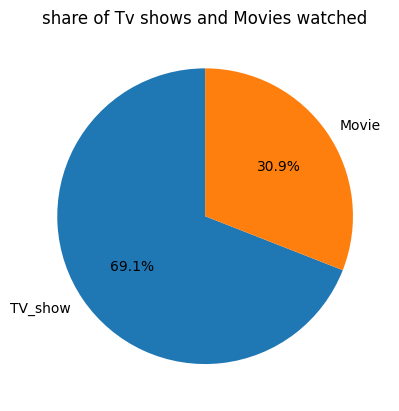

In [18]:
plt.pie(values, labels=labels, autopct='%1.1f%%',startangle=90)
plt.title('share of Tv shows and Movies watched')

##### 1. Why did you pick the specific chart?

Wanted to compare count of  movies and Tv shows in type column

##### 2. What is/are the insight(s) found from the chart?

Tv shows constitutes most of the watched contents in netflix with 69.1 %
while movies having only 30.1%

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

With a considerably greater proportion of 69.1% for TV shows compared to a smaller percentage of 30.9% for movies, the data clearly reveals that people prefer TV shows over movies. This suggests that instead of spending their time on longer, possibly less engaging films, people prefer to watch shorter formats like TV shows.

#### Chart - 2

In [19]:
df_grouped = df.groupby(['year_added', 'type']).size().reset_index(name='content_added')
df_grouped

,year_added,type,content_added
0,2008.0,Movie,1
1,2008.0,TV Show,1
2,2009.0,Movie,2
3,2010.0,Movie,1
4,2011.0,Movie,13
5,2012.0,Movie,3
6,2013.0,Movie,6
7,2013.0,TV Show,4
8,2014.0,Movie,19
9,2014.0,TV Show,5


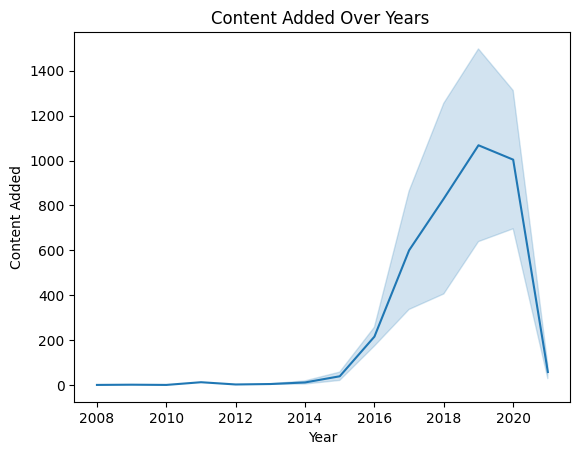

In [20]:
sns.lineplot(data=df_grouped, x='year_added', y='content_added')
plt.xlabel('Year')
plt.ylabel('Content Added')
plt.title('Content Added Over Years ')
plt.show()

##### 1. Why did you pick the specific chart?

To see the growth of contents added over the years

##### 2. What is/are the insight(s) found from the chart?

There were comparatively less TV shows and movies added to Netflix between 2008 and 2022. Nonetheless, there was a minor uptick in the addition of new content beginning in 2016. The number of new films added reached a notable peak in 2019, with TV shows following suit, albeit at a slower rate of growth than movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart show that Netflix is doing well because the number of people using the platform to watch movies and tv shows has been rising over time. With this expansion, Netflix will have the chance to offer its audience more top-notch content, which will raise user happiness and engagement levels.

#### Chart - 3

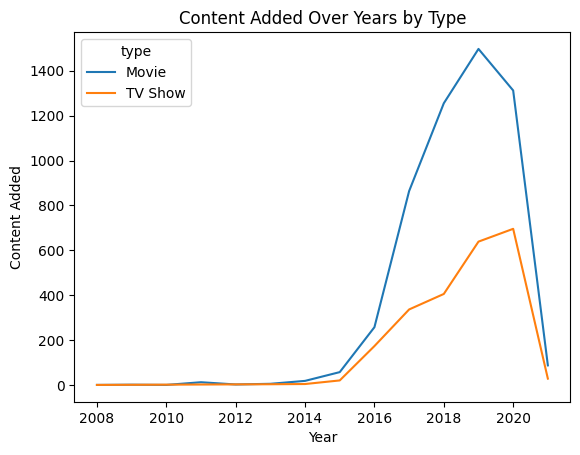

In [21]:
sns.lineplot(data=df_grouped, x='year_added', y='content_added',hue='type')
plt.xlabel('Year')
plt.ylabel('Content Added')
plt.title('Content Added Over Years by Type')
plt.show()

##### 1. Why did you pick the specific chart?

Want to compare the content added over the year by Tv shows and movies

##### 2. What is/are the insight(s) found from the chart?

Tv shows and movies had almost same number of tv shows and movies added but after 2016 as the demand and reach of the plot increased moth Tv shoews and movies had s steady increase but from 2016 tv shos grew rapidly in contents compared to movies

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the visualization it is clear that the quality and quantity of Tvshows have drastically increased after 2016 providing an oppurtunity for the plotform to do more TV show contents.

#### Chart - 4

In [22]:
df_grouped = df.groupby(['month_added', 'type']).size().reset_index(name='content_added')


df_grouped_2 = df_grouped.groupby('month_added')['content_added'].mean().reset_index()

df_grouped_2

,month_added,content_added
0,1.0,373.0
1,2.0,233.0
2,3.0,330.5
3,4.0,298.0
4,5.0,268.5
5,6.0,269.0
6,7.0,296.0
7,8.0,306.0
8,9.0,307.0
9,10.0,390.0


In [23]:
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df_grouped_2['month_name'] = df_grouped_2['month_added'].map(month_mapping)

Text(0.5, 1.0, 'Average Content Added by Month')

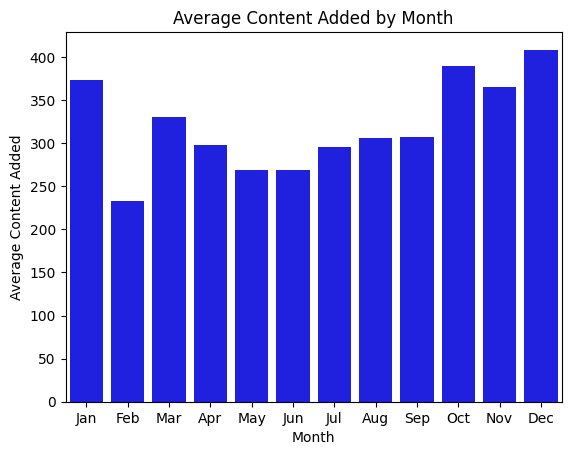

In [24]:
sns.barplot(x='month_name', y='content_added', data=df_grouped_2, color="blue")
plt.xlabel('Month')
plt.ylabel('Average Content Added')
plt.title('Average Content Added by Month')

##### 1. Why did you pick the specific chart?

Wanted to compare the content added on every months.

##### 2. What is/are the insight(s) found from the chart?

October through December sees a discernible increase in the quantity of TV series and films that are made available on the Netflix platform. Halloween, Diwali, Thanksgiving, and Christmas are just a few of the holidays and events that fall between October and December. As a result, people tend to spend more time at home and look for entertainment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The information gathered about the rise in TV series and films available on Netflix from October to December may have a favourable effect on company

#### Chart - 5

In [ ]:
sns.countplot(data=df,x='month_added',hue='type')
plt.xlabel('Month')
plt.title('Average Content Added by Month by type')

##### 1. Why did you pick the specific chart?

To compare the number of Tv shows and Movies added on eavh month.

##### 2. What is/are the insight(s) found from the chart?

In terms of Movies compared to other months, January, October, and December seem to be the trending months for Netflix movie arrivals and in terms of TV Shows compared to other months, October, November, and December stand up as the trending months for new TV show additions on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The information gathered about the months when Netflix films and TV series are trending may have a good effect on company.

#### Chart - 6

In [25]:
df['cast']

,cast
0,"João Miguel, Bianca Comparato, Michel Gomes, R..."
1,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ..."
2,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ..."
3,"Elijah Wood, John C. Reilly, Jennifer Connelly..."
4,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar..."
...,...
7782,"Imad Creidi, Antoinette Turk, Elias Gergi, Car..."
7783,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan..."
7784,Nasty C
7785,"Adriano Zumbo, Rachel Khoo"


In [26]:
cast=df['cast'].str.split(',',expand=True).stack()
cast.value_counts()

,count
others,718
Anupam Kher,38
Takahiro Sakurai,28
Shah Rukh Khan,27
Om Puri,27
...,...
Juan Manuel Diaz,1
Ana Wills,1
Mauricio Figueroa,1
Matias Maldonado,1


In [27]:
cast=cast[cast!='others']

In [28]:
cast.value_counts()

,count
Anupam Kher,38
Takahiro Sakurai,28
Om Puri,27
Shah Rukh Khan,27
Boman Irani,25
...,...
Juan Manuel Diaz,1
Ana Wills,1
Mauricio Figueroa,1
Matias Maldonado,1


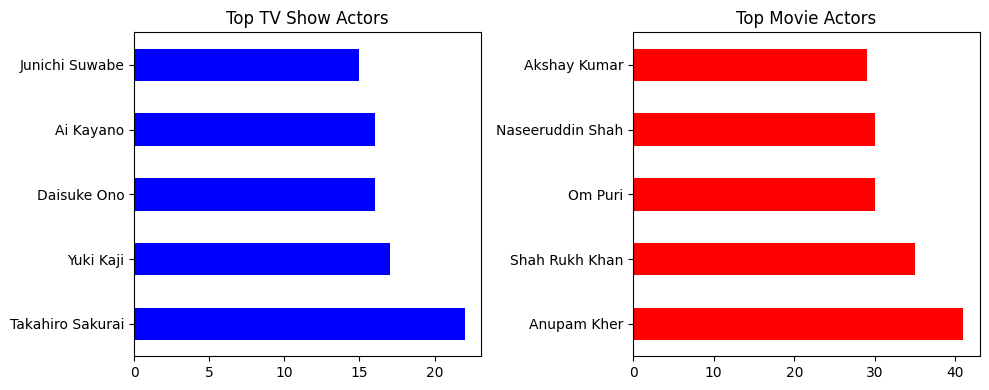

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

top_tvshow_actors = df[df['type'] == 'TV Show']['cast'].str.split(',', expand=True).stack()
top_tvshow_actors = top_tvshow_actors[top_tvshow_actors != 'others'].str.strip()  # Strip any extra spaces
top_tvshow_actors.value_counts().head().plot(kind='barh', ax=ax[0], color='blue')
ax[0].set_title('Top TV Show Actors')

top_movie_actors = df[df['type'] == 'Movie']['cast'].str.split(',', expand=True).stack()
top_movie_actors = top_movie_actors[top_movie_actors != 'others'].str.strip()  # Strip any extra spaces
top_movie_actors.value_counts().head().plot(kind='barh', ax=ax[1], color='red')
ax[1].set_title('Top Movie Actors')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To compare the top 10 movie actors and Tv Shows

##### 2. What is/are the insight(s) found from the chart?

The bars' horizontal arrangement makes it simpler to read and compare the values. The number of TV shows or movies that an actor has acted in is indicated by the length of each bar. In addition to having names, the chart has two subplots that clearly indicate that one represents TV shows and the other represents movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Takahiro Sakurai is the actor with the most appearances in TV Shows. Anupam Kher is the actor with the most appearances in the movies category.

#### Chart - 7

In [30]:
top_genres=df['listed_in'].value_counts().iloc[:10]
top_genres

,count
listed_in,
Documentaries,334
Stand-Up Comedy,321
"Dramas, International Movies",320
"Comedies, Dramas, International Movies",243
"Dramas, Independent Movies, International Movies",215
Kids' TV,205
Children & Family Movies,177
"Documentaries, International Movies",172
"Children & Family Movies, Comedies",169


<Axes: ylabel='count'>

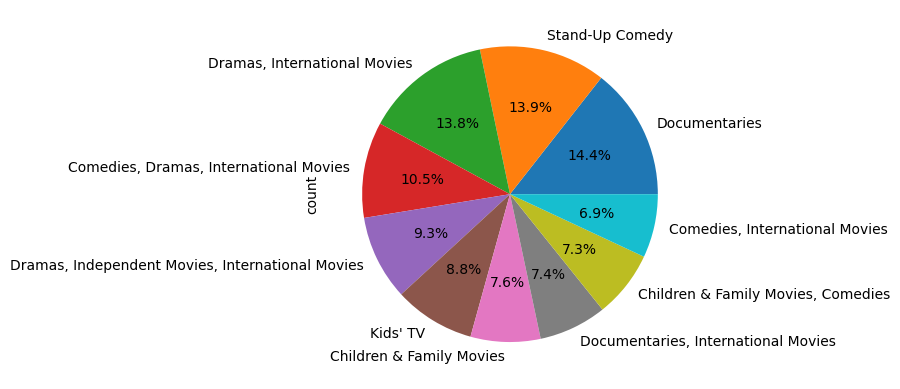

In [31]:
top_genres.plot(kind='pie',autopct='%1.1f%%')

##### 1. Why did you pick the specific chart?

To compare the contribution of different genres

##### 2. What is/are the insight(s) found from the chart?

When compared to the other genres in the top 10, documentaries with 14.4%,
stand up comedy with 13.8% and Drama, International Movies have 13.8% have the largest share.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The knowledge gathered from examining Netflix's genre distribution may have a number of beneficial effects on business.
1. Content Curation: Netflix can guarantee that it provides a varied and enticing assortment of films and series to its customers by concentrating on categories that have strong audience demand.
2. Targeted Acquisitions and Productions: It might help them find popular genres with established fan bases. This might maximise their expenditures on the acquisition and production of content.
3. Personalised Recommendations: These are recommendations that are specific to each user, enhancing their whole experience and motivating them to utilise the site more frequently.

#### Chart - 9

In [32]:
df['country'].value_counts()

,count
country,
United States,2555
India,923
others,507
United Kingdom,397
Japan,226
...,...
"Russia, United States, China",1
"Italy, Switzerland, France, Germany",1
"United States, United Kingdom, Canada",1


In [33]:
new_df=df[df['country']!='others']
top_contributing_countries=new_df['country'].value_counts().iloc[:10]

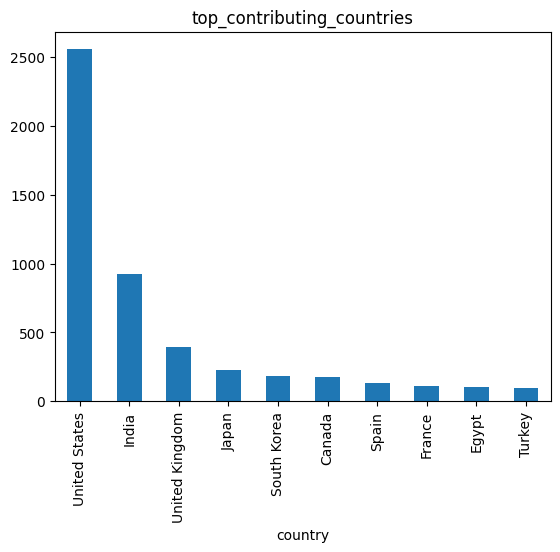

In [34]:
top_contributing_countries.plot(kind='bar')
plt.title('top_contributing_countries')
plt.show()

##### 1. Why did you pick the specific chart?

To compare the top contries where the contents are coming from.

##### 2. What is/are the insight(s) found from the chart?

Through the chart we can analyse that most of the content are coming from america.India is in second position.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By knowing the countries where most number of the contents are made the platform can use this to improve and expand business to those countries and also can concentrate on the countris which are performing less.

#### Chart -10

<ipython-input-35-19ee85c9f65e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  hist=sns.distplot(df['year_added'])


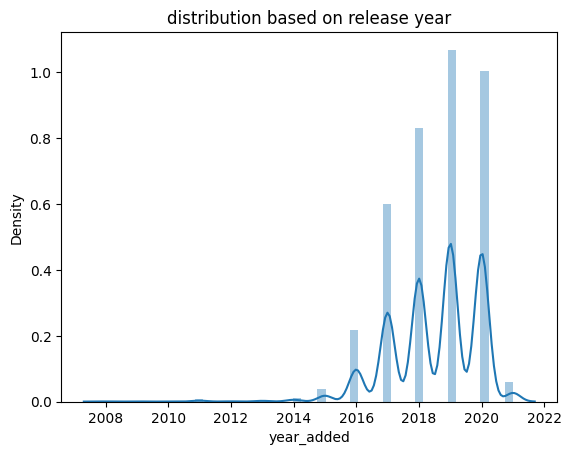

In [35]:
hist=sns.distplot(df['year_added'])
plt.title('distribution based on release year')
plt.show()

##### 1. Why did you pick the specific chart?

To see the distibution of content based on year

##### 2. What is/are the insight(s) found from the chart?

From the visualisation it is very evident that most of the content was added in the years between 2017 and 2020.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix can use this data to analyse its yearly activity and can also compare them.

#### Chart - 11

In [43]:
df['rating'].value_counts().iloc[:8]

,count
rating,
TV-MA,2863
TV-14,1931
TV-PG,806
R,665
PG-13,386
TV-Y,280
TV-Y7,271
PG,247


Text(0.5, 1.0, 'top contents by rating')

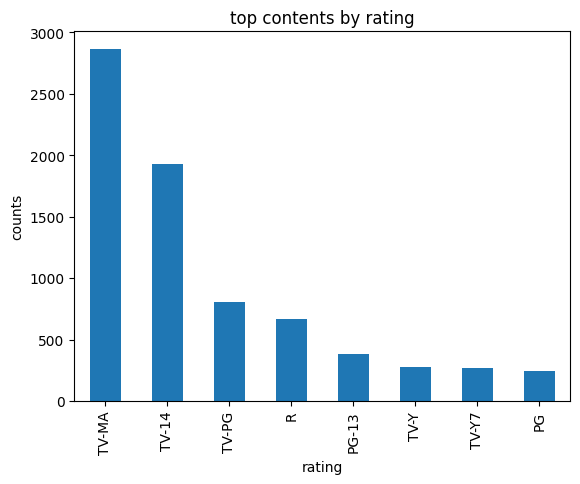

In [47]:
df['rating'].value_counts().iloc[:8].plot(kind='bar')
plt.xlabel('rating')
plt.ylabel('counts')
plt.title('top contents by rating')

##### 1. Why did you pick the specific chart?

Top compare the top contents by rating

##### 2. What is/are the insight(s) found from the chart?

TV-MA: This classification indicates that the material is exclusively meant for older viewers. It might include strong language, explicit sexual material, or graphic violence. When it comes to ratings, TV-MA is the most often used classification, and it covers both TV Shows and movies.

#### Chart - 12

Text(0.5, 1.0, 'top contents by rating by type')

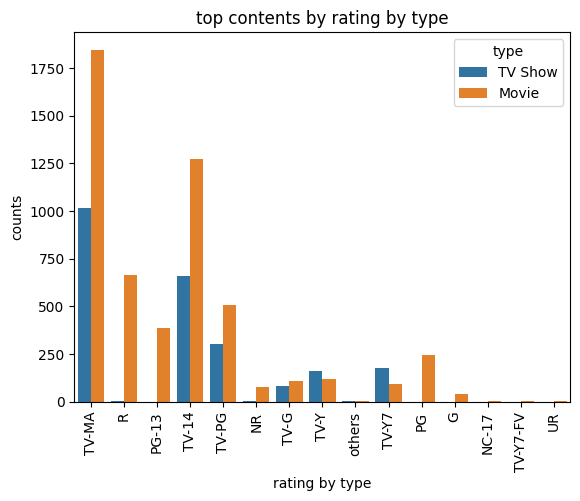

In [48]:
sns.countplot(data=df,x='rating',hue='type')
plt.xticks(rotation=90)
plt.xlabel('rating by type')
plt.ylabel('counts')
plt.title('top contents by rating by type')

##### 1. Why did you pick the specific chart?

To compare top rated contents by type.

##### 2. What is/are the insight(s) found from the chart?

TV-MA: This classification indicates that the material is exclusively meant for older viewers. It might include strong language, explicit sexual material, or graphic violence.
When it comes to ratings, TV-MA is the most often used classification, and it covers both TV Shows and movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The knowledge that TV-MA is the most widely used rating for motion pictures and television programs can help with audience targeting and content initiatives. Making choices about programming and diversifying material will have a beneficial commercial impact on viewership and consumer satisfaction.

#### Chart - 13

In [62]:
df['director'].value_counts()

,count
director,
others,2389
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
...,...
Andrew C. Erin,1
Vibhu Virender Puri,1
Lucien Jean-Baptiste,1


In [63]:
new_df=df[df['director']!='others']

In [64]:
new_df['director'].value_counts().iloc[:10]

,count
director,
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Youssef Chahine,12
Martin Scorsese,12
Jay Chapman,12
Steven Spielberg,10
David Dhawan,9


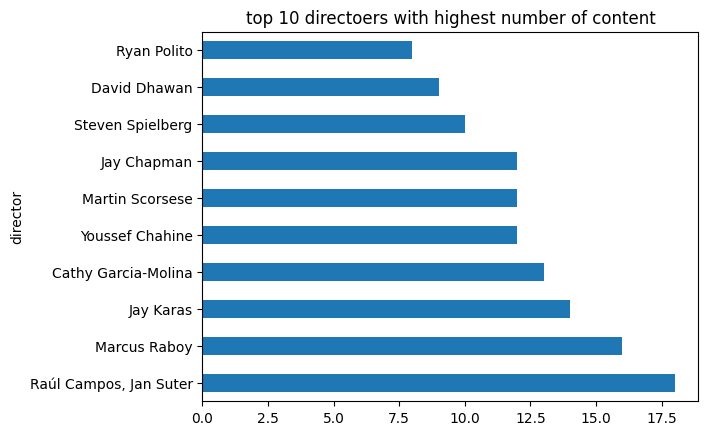

In [67]:
new_df['director'].value_counts().iloc[:10].plot(kind='barh')
plt.title('top 10 directoers with highest number of content')
plt.show()

##### 1. Why did you pick the specific chart?

To compare top directors of movies and tv shows

##### 2. What is/are the insight(s) found from the chart?

The directors Raúl Campos and Jan Suter have the highest count in terms of overall Movies and TV shows on Netflix.
Chart - 14

#### Chart - 14 - Correlation Heatmap

In [68]:
ratings = {
'TV-PG': 'Older Kids',
'TV-MA': 'Adults',
'TV-Y7-FV': 'Older Kids',
'TV-Y7': 'Older Kids',
'TV-14': 'Teens',
'R': 'Adults',
'TV-Y': 'Kids',
'NR': 'Adults',
'PG-13': 'Teens',
'TV-G': 'Kids',
'PG': 'Older Kids',
'G': 'Kids',
'UR': 'Adults',
'NC-17': 'Adults'}

df['target_ages']=df['rating'].replace(ratings)

In [72]:
df['count'] = 1
data = df.groupby('country')['count'].sum().sort_values(ascending=False).reset_index()

countries = data['country']

df_heatmap = df[df['country'].isin(countries)]

df_heatmap = pd.crosstab(df_heatmap['country'], df_heatmap['target_ages'], normalize='index').T

df_heatmap

country,Argentina,"Argentina, Brazil, France, Poland, Germany, Denmark","Argentina, Chile","Argentina, Chile, Peru","Argentina, France","Argentina, France, United States, Germany, Qatar","Argentina, Italy","Argentina, Spain","Argentina, United States","Argentina, United States, Mexico",...,"Uruguay, Argentina, Spain","Uruguay, Germany","Uruguay, Guatemala","Uruguay, Spain, Mexico",Venezuela,"Venezuela, Colombia",Vietnam,West Germany,Zimbabwe,others
target_ages,,,,,,,,,,,,,,,,,,,,,
Adults,0.74,0.0,0.0,1.0,1.0,1.0,1.0,0.875,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.4,1.0,0.0,0.317554
Kids,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.2,0.0,1.0,0.171598
Older Kids,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.234714
Teens,0.14,1.0,1.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.4,0.0,0.0,0.274162
others,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001972


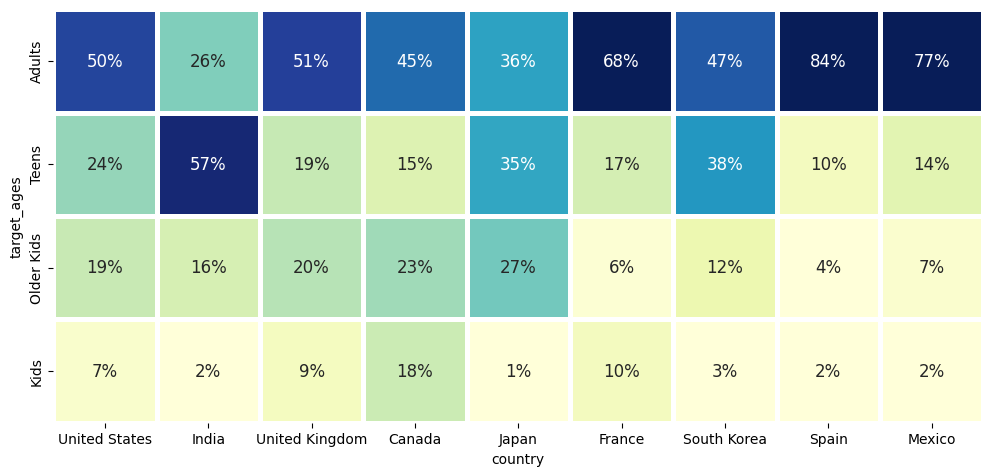

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap.loc[age_order, country_order2],
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})

plt.show()

##### 1. Why did you pick the specific chart?

To understand the relation betweeen two categorial varibales, country and content rating.

##### 2. What is/are the insight(s) found from the chart?

Spain stands out among the listed nations with the highest percentage of adults expressing interest (84%). This suggests that folks in Spain have a keen interest in the topic.Overall, these findings show how different target age groups and nations have differing degrees of interest in the topic. According to the research, Canada has considerably lesser interest than the other countries, whereas Spain, France, India, and Mexico have higher levels of interest in adults.

#### Chart - 15 - Pair Plot

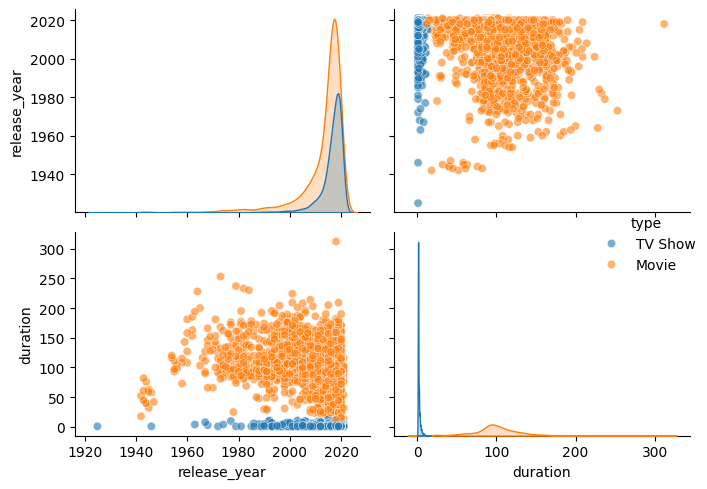

In [74]:
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

df['duration'] = df['duration'].str.extract('(\d+)').astype(float)

columns_to_plot = ['type', 'release_year', 'duration', 'rating']

sns.pairplot(df[columns_to_plot], hue='type', height=2.5, aspect=1.2, plot_kws={'alpha': 0.6})

plt.tight_layout()

plt.show()

##### 1. Why did you pick the specific chart?

This kind of graphic lets us see the connections between runtime, rating, and year of release while also differentiating between films and television series. It's an effective method to quickly scan your dataset and identify any noteworthy trends or variations between TV series and films in relation to these factors.

##### 2. What is/are the insight(s) found from the chart?

he distribution of content between Movies and TV Shows could reveal Netflix's content strategy. Trends in release years might show how Netflix has expanded its library over time. Duration patterns could highlight differences in typical lengths for Movies versus TV Shows. Finally, the relationship between ratings and other variables might indicate how content characteristics correlate with audience reception or Netflix's content selection criteria.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

In [10]:
# making copy of df_clean_frame
netflix_hypothesis=df.copy()

In [11]:
netflix_hypothesis.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14.0,2020.0,8.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23.0,2016.0,12.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20.0,2018.0,12.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16.0,2017.0,11.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1.0,2020.0,1.0


In [25]:
netflix_hypothesis=netflix_hypothesis[netflix_hypothesis['type'] == 'Movie']

In [27]:
rating_ages= {
              'TV-PG': 'Older Kids',
              'TV-MA': 'Adults',
              'TV-Y7-FV': 'Older Kids',
              'TV-Y7': 'Older Kids',
              'TV-14': 'Teens',
              'R': 'Adults',
              'TV-Y': 'Kids',
              'NR': 'Adults',
              'PG-13': 'Teens',
              'TV-G': 'Kids',
              'PG': 'Older Kids',
              'G': 'Kids',
              'UR': 'Adults',
              'NC-17': 'Adults'}

netflix_hypothesis['target_ages']=netflix_hypothesis['rating'].replace(rating_ages)

In [28]:
netflix_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids', nan], dtype=object)

In [29]:
netflix_hypothesis['target_ages']=pd.Categorical(netflix_hypothesis['target_ages'],categories=['Older Kids', 'Adults', 'Teens', 'Kids'])
netflix_hypothesis['duration']=netflix_hypothesis['duration'].astype('str')
netflix_hypothesis['duration']=netflix_hypothesis['duration'].str.extract('(\d+)')
netflix_hypothesis['duration']=pd.to_numeric(netflix_hypothesis['duration'])

In [31]:
netflix_hypothesis.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added,target_ages
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23.0,2016.0,12.0,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20.0,2018.0,12.0,Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16.0,2017.0,11.0,Teens
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,1.0,2020.0,1.0,Teens
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",1.0,2020.0,6.0,Adults


In [34]:
group_by_=netflix_hypothesis[['duration','target_ages']].groupby(by='target_ages')
group=group_by_.mean().reset_index()
group

<ipython-input-34-24731f4a5673>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_by_=netflix_hypothesis[['duration','target_ages']].groupby(by='target_ages')


,target_ages,duration
0,Older Kids,92.024648
1,Adults,98.275145
2,Teens,110.025332
3,Kids,66.486891


In [36]:
A = group_by_.get_group('Kids')
B = group_by_.get_group('Older Kids')

A['duration'] = pd.to_numeric(A['duration'], errors='coerce')
B['duration'] = pd.to_numeric(B['duration'], errors='coerce')

M1 = A['duration'].mean()
S1 = A['duration'].std()

M2 = B['duration'].mean()
S2 = B['duration'].std()

print('Mean for movies rated for Kids: {}'.format(M1))
print('Mean for movies rated for Older Kids: {}'.format(M2))
print('Std for movies rated for Kids: {}'.format(S1))
print('Std for movies rated for Older Kids: {}'.format(S2))


Mean for movies rated for Kids: 66.48689138576779
Mean for movies rated for Older Kids: 92.02464788732394
Std for movies rated for Kids: 31.739464779840176
Std for movies rated for Older Kids: 31.182576758429978


<ipython-input-36-7d10b7cff331>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A['duration'] = pd.to_numeric(A['duration'], errors='coerce')
<ipython-input-36-7d10b7cff331>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['duration'] = pd.to_numeric(B['duration'], errors='coerce')


In [38]:
n1=len(A)
n2=len(B)
print(n1,n2)

dof=n1+n2-2
print('dof=',dof)

sp_2=((n2-1)*S1**2 + (n1-1)*S2**2)/dof
print('sp-2=',sp_2)

sp=np.sqrt(sp_2)
print('sp=',sp)

# t value
t_val=(M1-M2)/(sp*np.sqrt(1/n1+1/n2))
print('t_value=',t_val)

267 852
dof= 1117
sp-2= 999.0491470682085
sp= 31.6077387212089
t_value= -11.51992627853396


### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

HO:Movies rated for kids and older kids are at least two hours long. (Null Hypothesis)

H1:Movies rated for kids and older kids are not at least two hours long (Alternate Hypothesis)

#### 2. Perform an appropriate statistical test.

In [42]:
# t_distribution
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [43]:
# t_distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

##### Which statistical test have you done to obtain P-Value?

The P-value is obtained by conducting a one-way ANOVA (Analysis of Variance) test using the stats.f_oneway function from the scipy.stats module.

##### Why did you choose the specific statistical test?

I chose the one-way ANOVA (Analysis of Variance) test because it is the appropriate statistical test for comparing the means of two or more independent groups to determine if there is a statistically significant difference between them.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis(H0):There is no significant difference in the distribution of movie and TV show genres, directors, casts, countries, and release years in the dataset.

Alternate Hypothesis (H1):
There is a significant difference in the distribution of movie and TV show genres, directors, casts, countries, and release years in the dataset.

#### 2. Perform an appropriate statistical test.

In [52]:
import scipy.stats as stats

In [53]:
type_table = pd.crosstab(df['type'], df['type'])
director_table = pd.crosstab(df['type'], df['director'])
cast_table = pd.crosstab(df['type'], df['cast'])
country_table = pd.crosstab(df['type'], df['country'])
year_table = pd.crosstab(df['type'], df['release_year'])



In [54]:
type_chi2, type_p, type_dof, type_expected = stats.chi2_contingency(type_table)
director_chi2, director_p, director_dof, director_expected = stats.chi2_contingency(director_table)
cast_chi2, cast_p, cast_dof, cast_expected = stats.chi2_contingency(cast_table)
country_chi2, country_p, country_dof, country_expected = stats.chi2_contingency(country_table)
year_chi2, year_p, year_dof, year_expected = stats.chi2_contingency(year_table)

print("Type p-value:", type_p)
print("Director p-value:", director_p)
print("Cast p-value:", cast_p)
print("Country p-value:", country_p)
print("Release Year p-value:", year_p)

Type p-value: 0.0
Director p-value: 4.850350153850525e-13
Cast p-value: 0.1172915998980007
Country p-value: 5.4979407801969554e-86
Release Year p-value: 1.7506909615749571e-60


##### Which statistical test have you done to obtain P-Value?

The p-values obtained from the Chi-Square Test will help us determine the significance of the differences in the distribution of the variables.

##### Why did you choose the specific statistical test?

The Chi-Square Test helps us understand if there are significant differences in the distribution of movie and TV show genres, directors, casts, countries, and release years.

## ***6. Feature Engineering & Data Pre-processing***

In [3]:
df['clustering']=df['director']+' '+df['cast']+' '+df['country']+' '+df['listed_in']+' '+df['description']

In [4]:
df['clustering'][1]

'Jorge Michel Grau Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato Mexico Dramas, International Movies After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.'

###  Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
def transform_text(text):
    if not isinstance(text, str):
        return ''
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Tokenize text into words
    words = word_tokenize(text)

    # Remove non-alphanumeric characters
    words = [word for word in words if word.isalnum()]

    # Remove stop words and punctuation
    stopwords_set = set(stopwords.words('english'))
    punctuation_set = set(string.punctuation)
    words = [word for word in words if word not in stopwords_set and word not in punctuation_set]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(lemmatized_words)

In [7]:
df['clean_text']=df['clustering'].apply(transform_text)

In [8]:
df['clean_text'][1]

'jorge michel grau demián bichir héctor bonilla oscar serrano azalia ortiz octavio michel carmen beato mexico drama international movie devastating earthquake hit mexico city trapped survivor walk life wait rescued trying desperately stay alive'

# Text Vectoring

TF-IDF combines two metrics: Term frequency (TF) and inverse document frequency (IDF).

Term Frequency (TF): This metric measures the frequency of a term in a document. It assumes that the more often a term appears in a document, the more relevant it is to that document.

 It is calculated using the formula:
TF(t, d) = (Number of times term t appears in document d) / (Total number of terms in document d)

Inverse Document Frequency (IDF): This metric measures the importance of a term across a collection of documents. It gives
higher weight to terms that appear less frequently in the entire collection.

It is calculated using the formula:
IDF(t) = log_e(Total number of documents / Number of documents containing term t)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

bag_of_words = df['clean_text']
t_vectorizer = TfidfVectorizer(max_features=20000)
X = t_vectorizer.fit_transform(bag_of_words)


In [10]:
print(X.shape)

(7787, 20000)


In [20]:
features = t_vectorizer.get_feature_names_out()
print(features)

['007' '10' '100' ... 'şimşek' 'şinasi' 'şükran']


# Dimensionality Reduction

PCA to reduce the dimensionality of the dataset. PCA identifies the directions (principal components) along which the data varies the most. These components are ordered by the amount of variance they explain in the data.

PCA can extract the most relevant features from a dataset. It transforms the original features into a new set of uncorrelated variables called. principal components. These components are linear combinations of the original features and capture the maximum amount of variation present in the data.

In [14]:
from sklearn.decomposition import PCA

In [12]:
from sklearn.decomposition import TruncatedSVD

In [25]:
transformer = TruncatedSVD(n_components=500)  # You can adjust the number of components
X_reduced = transformer.fit_transform(X)

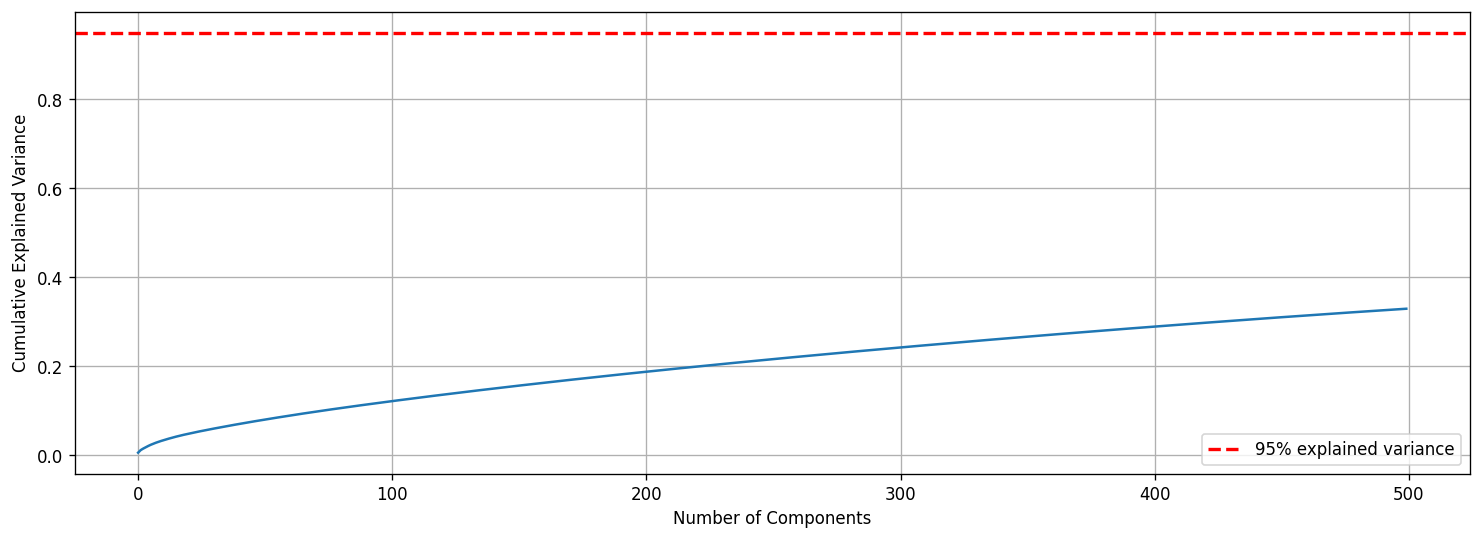

In [26]:
plt.figure(figsize=(15, 5), dpi=120)
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', linewidth=2, label='95% explained variance')
plt.grid(True)
plt.legend(loc='best')
plt.show()

The plot helps in determining the number of components to consider for dimensionality reduction. You can select the number of components where the cumulative explained variance reaches a satisfactory threshold, such as 95%. The point where the curve intersects or is closest to the threshold line can guide you in choosing the appropriate number of components for your analysis.

## ***7. ML Model Implementation***

In [ ]:
pca_tunned=PCA(n_components = 0.95)
pca_tunned.fix(X.toarray())
X_transformed=pca_tunned.transform(x.toarray())

In [ ]:
from sklearn.decomposition import PCA, IncrementalPCA
import numpy as np

pca = PCA()
pca.fit(X.toarray())
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
pca_tunned = IncrementalPCA(n_components=n_components)

batch_size = 1000

for i in range(0, X.shape[0], batch_size):
    pca_tunned.partial_fit(X[i:i + batch_size].toarray())


X_transformed = np.vstack([
    pca_tunned.transform(X[i:i + batch_size].toarray()) for i in range(0, X.shape[0], batch_size)
])

### ML Model - 1

In [13]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
model=KMeans(random_state=5)
visualizer=KElbowVisualizer(model,K=(4,22),metric='silhouttee',timings=False,locate_elbow=True)
visualizer.fit(X_transformed)
visualizer.show()


The plot will also indicate the "elbow" point, which represents the recommended number of clusters based on the selected metric.Using elbow plot with the optimal number of 5 clusters.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

def silhouette_score_analysis(n):
    for n_clusters in range(2, n):
        km = KMeans(n_clusters=n_clusters, random_state=5)
        preds = km.fit_predict(X_transformed)
        centers = km.cluster_centers_
        score = silhouette_score(X_transformed, preds, metric='euclidean')
        print("For n_clusters = {}, silhouette score is {:.3f}".format(n_clusters, score))


        visualizer = SilhouetteVisualizer(km)
        visualizer.fit(X_transformed)
        visualizer.show()


silhouette_score_analysis(10)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

To evaluate a KMeans clustering model, we use metrics like the Silhouette Score and the Elbow Method:

Silhouette Score: Measures how well each data point fits its cluster compared to other clusters. Higher scores (near 1) indicate better clustering, while scores near 0 suggest overlapping clusters.

Elbow Method: Helps determine the optimal number of clusters by plotting the within-cluster sum of squares (WCSS) against the number of clusters. The "elbow" point indicates the optimal number of clusters where adding more does not significantly improve WCSS.Visualization:

Silhouette Score Chart: Shows silhouette scores for different numbers of clusters.
Elbow Method Chart: Displays WCSS for varying numbers of clusters to identify the elbow point.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define model and parameter grid
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20]
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

##### Which hyperparameter optimization technique have you used and why?

Grid Search. It is a hyperparameter optimization technique that exhaustively tests all possible combinations of specified parameters. It ensures a thorough search but can be computationally expensive and time-consuming, especially with a large parameter grid. Grid Search is useful when the parameter space is small and you want to find the optimal combination with certainty. It systematically evaluates each combination to find the best model performance.

# **Conclusion**

It's noteworthy to observe that movies make up the bulk of the content that Netflix offers. On the other hand, the platform has emphasised TV shows more recently.The majority of these programs are broadcast at the start or close of the year.Of the top five nations that create all of the content that is accessible on the site, the US and India are included. Furthermore, six actors from India are among the top ten with the most content.TV-MA leads the charts in terms of content ratings, suggesting that mature content is more well-liked on Netflix.The content was divided into 10 different clusters using the value of k=15, which was determined to be the best fit for clustering the data.Using this data, a cosine similarity-based content-based recommender system that offered suggestions for films and TV series was developed.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***